# Project 1

## Step 1: Open the `sat_scores.csv` file. Investigate the data, and answer the questions below.


##### 1. What does the data describe?

SAT scores by state. Had to do some googling, and it appears that it is the average SAT in each state + DC, as well as the overall national average. Rate is the participation rate in that state (the percentage of high school students who take the test).

##### 2. Does the data look complete? Are there any obvious issues with the observations?

It appears to cover all 50 states plus DC, and a summary line. None of the numbers seems to be unusually wrong, badly formatted or outside the expected ranges.

##### 3. Create a data dictionary for the dataset.

State: The two letter abbreviation for the state. "All" is national summary.

Rate: Participation rate within the state.

Verbal: Average SAT verbal score in the state.

Math: Average SAT math score in the state.

## Step 2: Load the data.

##### 4. Load the data into a list of lists

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import csv
%matplotlib inline

#Going to read in to this variable
scores_list = []

data_path = "sat_scores.csv"

with open(data_path) as file:
    for row in csv.reader(file):
        scores_list.append(row)

##### 5. Print the data

In [4]:
print [score for score in scores_list]

[['State', 'Rate', 'Verbal', 'Math'], ['CT', '82', '509', '510'], ['NJ', '81', '499', '513'], ['MA', '79', '511', '515'], ['NY', '77', '495', '505'], ['NH', '72', '520', '516'], ['RI', '71', '501', '499'], ['PA', '71', '500', '499'], ['VT', '69', '511', '506'], ['ME', '69', '506', '500'], ['VA', '68', '510', '501'], ['DE', '67', '501', '499'], ['MD', '65', '508', '510'], ['NC', '65', '493', '499'], ['GA', '63', '491', '489'], ['IN', '60', '499', '501'], ['SC', '57', '486', '488'], ['DC', '56', '482', '474'], ['OR', '55', '526', '526'], ['FL', '54', '498', '499'], ['WA', '53', '527', '527'], ['TX', '53', '493', '499'], ['HI', '52', '485', '515'], ['AK', '51', '514', '510'], ['CA', '51', '498', '517'], ['AZ', '34', '523', '525'], ['NV', '33', '509', '515'], ['CO', '31', '539', '542'], ['OH', '26', '534', '439'], ['MT', '23', '539', '539'], ['WV', '18', '527', '512'], ['ID', '17', '543', '542'], ['TN', '13', '562', '553'], ['NM', '13', '551', '542'], ['IL', '12', '576', '589'], ['KY', '12

##### 6. Extract a list of the labels from the data, and remove them from the data.

In [5]:
#First Row contains the labels. Remove it.
header_row = scores_list.pop(0)
print header_row

['State', 'Rate', 'Verbal', 'Math']


##### 7. Create a list of State names extracted from the data. (Hint: use the list of labels to index on the State column)

In [6]:
states = []
#We know it's index 0 from looking at the data, but do it the right way.
state_index = header_row.index("State")
states.append([score[state_index] for score in scores_list])

##### 8. Print the types of each column

In [7]:
print [type(col) for col in scores_list[0]]

[<type 'str'>, <type 'str'>, <type 'str'>, <type 'str'>]


##### 9. Do any types need to be reassigned? If so, go ahead and do it.

Three of the columns contain numeric values, I'll create a new list of lists, in which column 0 (state) remains the same, but column 1-3 are converted to type int. Under different circumstances I might write a routine to analyze the data and only convert it to int if it was truly numeric, perhaps making some adjustments if it wasn't what it should be. In this case the data appears clean and it's pretty straightforward.

In [8]:
scores_list_num = []
for i in range (0,len(scores_list)):
    new_row = []
    new_row.append(scores_list[i][0])        
    new_row += (map(int, scores_list[i][1:4]))
    scores_list_num.append(new_row)
print scores_list_num

[['CT', 82, 509, 510], ['NJ', 81, 499, 513], ['MA', 79, 511, 515], ['NY', 77, 495, 505], ['NH', 72, 520, 516], ['RI', 71, 501, 499], ['PA', 71, 500, 499], ['VT', 69, 511, 506], ['ME', 69, 506, 500], ['VA', 68, 510, 501], ['DE', 67, 501, 499], ['MD', 65, 508, 510], ['NC', 65, 493, 499], ['GA', 63, 491, 489], ['IN', 60, 499, 501], ['SC', 57, 486, 488], ['DC', 56, 482, 474], ['OR', 55, 526, 526], ['FL', 54, 498, 499], ['WA', 53, 527, 527], ['TX', 53, 493, 499], ['HI', 52, 485, 515], ['AK', 51, 514, 510], ['CA', 51, 498, 517], ['AZ', 34, 523, 525], ['NV', 33, 509, 515], ['CO', 31, 539, 542], ['OH', 26, 534, 439], ['MT', 23, 539, 539], ['WV', 18, 527, 512], ['ID', 17, 543, 542], ['TN', 13, 562, 553], ['NM', 13, 551, 542], ['IL', 12, 576, 589], ['KY', 12, 550, 550], ['WY', 11, 547, 545], ['MI', 11, 561, 572], ['MN', 9, 580, 589], ['KS', 9, 577, 580], ['AL', 9, 559, 554], ['NB', 8, 562, 568], ['OK', 8, 567, 561], ['MO', 8, 577, 577], ['LA', 7, 564, 562], ['WI', 6, 584, 596], ['AR', 6, 562, 55

##### 10. Create a dictionary for each column mapping the State to its respective value for that column. 

In [9]:
dict_rate = {}
dict_verbal = {}
dict_math ={}

for row in scores_list_num:
    dict_rate[row[0]] = row[1]
    dict_verbal[row[0]] = row[2]
    dict_math[row[0]] = row[3]

##### 11. Create a dictionary with the values for each of the numeric columns

In [10]:
def dict_by_value(dict_input):
    """
    Takes dictionary input, returns output as dictionary keyed to
    original values, with the original keys now stored as lists of values.
    """
    dict_output = {}
    for key, value in dict_input.items():
        if value in dict_output.keys():
            dict_output[value].append(key)
        else:    
            dict_output[value] = [key]
    return dict_output

# Now apply it to the three existing dictionaries. Now we have one each that summarizes the states
# with each average score. In this situation, there may be more than one state with the same score.
dict_rate_by_value = dict_by_value(dict_rate)
dict_verbal_by_value = dict_by_value(dict_verbal)
dict_math_by_value = dict_by_value(dict_math)


## Step 3: Describe the data

##### 12. Print the min and max of each column

In [11]:
print "Rates  min/max: " + str(min(dict_rate_by_value.keys())) + ' ' + str(max(dict_rate_by_value.keys()))
print "Verbal min/max: " + str(min(dict_verbal_by_value.keys())) + ' ' + str(max(dict_verbal_by_value.keys()))
print "Math   min/max: " + str(min(dict_math_by_value.keys())) + ' ' + str(max(dict_math_by_value.keys()))

Rates  min/max: 4 82
Verbal min/max: 482 593
Math   min/max: 439 603


##### 13. Write a function using only list comprehensions, no loops, to compute Standard Deviation. Print the Standard Deviation of each numeric column.

In [36]:
def myStdDev(myList):
    """
    Function takes a list of numbers and returns the standard deviation as a float
    """
    myMean = sum(myList)/float(len(myList))
    return sum([(float(value) - myMean) ** 2/len(dict_rate) for value in myList]) ** .5

print "Participation Rate Std Dev: %f" % myStdDev(dict_rate.values())
print "Verbal Score Std Dev: %f" % myStdDev(dict_verbal.values())
print "Math Score Std Dev: %f" % myStdDev(dict_math.values())
print

#Just for fun, compare to numpy std dev
print "Participation Rate Std Dev (Numpy): %f" % np.std(dict_rate.values())
print "Verbal Score Std Dev (Numpy): %f" % np.std(dict_verbal.values())
print "Math Score Std Dev(Numpy): %f" % np.std(dict_math.values())
print

# Also, mine is faster than numpy. So there.
%timeit myStdDev(dict_rate.values())
%timeit np.std(dict_rate.values())

Participation Rate Std Dev: 27.037996
Verbal Score Std Dev: 32.915095
Math Score Std Dev: 35.666996

Participation Rate Std Dev (Numpy): 27.037996
Verbal Score Std Dev (Numpy): 32.915095
Math Score Std Dev(Numpy): 35.666996

100000 loops, best of 3: 13.6 µs per loop
10000 loops, best of 3: 20.9 µs per loop


## Step 4: Visualize the data

##### 14. Using MatPlotLib and PyPlot, plot the distribution of the Rate using histograms.

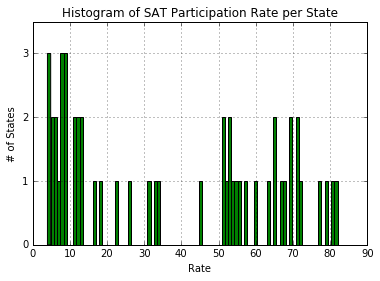

In [13]:
plt.hist(dict_rate.values(), 90, facecolor='green')
plt.xlabel('Rate')
plt.ylabel('# of States')
plt.title(r'Histogram of SAT Participation Rate per State')
plt.axis([0, 90, 0, 3.5])
plt.yticks(np.arange(0,3.5,1))
plt.grid(True)
plt.show()

##### 15. Plot the Math distribution

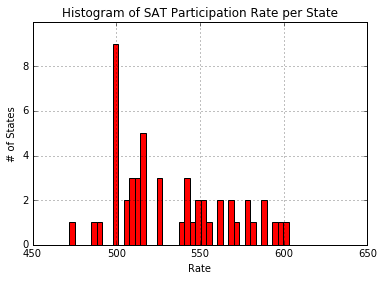

In [19]:
plt.hist(dict_math.values(), 50, facecolor='red')
plt.xlabel('Rate')
plt.ylabel('# of States')
plt.title(r'Histogram of SAT Math Scores by State')
plt.axis([450, 650, 0, 10])
plt.yticks(np.arange(0,10,2))
plt.grid(True)
plt.show()

##### 16. Plot the Verbal distribution

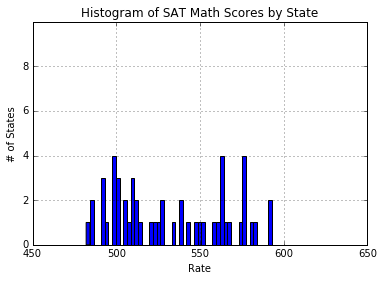

In [31]:
plt.hist(dict_verbal.values(), 50, facecolor='blue')
plt.xlabel('Rate')
plt.ylabel('# of States')
plt.title(r'Histogram of SAT Math Scores by State')
plt.axis([450, 650, 0, 10])
plt.yticks(np.arange(0,10,2))
plt.grid(True)
plt.show()

##### 17. What is the typical assumption for data distribution?

The typical assumption is a gaussian distribution. This is not always a good assumption to make. (See Taleb.)

##### 18. Does that distribution hold true for our data?

No. And one would not expect that it should. This is not a distribution of individual performance, rather it is a distribution of state averages. While one would expect there to be some variability of regional averages, it would not be reasonable to presume that such a distribution would be gaussian. There are other issues, such as the varied participation rate in different states that would also tend to cause the date to be unusually distributed.

##### 19. Plot some scatterplots. **BONUS**: Use a PyPlot `figure` to present multiple plots at once.

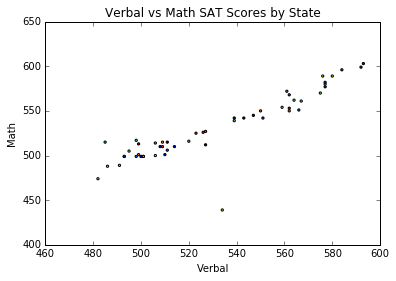

In [25]:
#A Scatter Plot by State
x = [i[2] for i in scores_list_num]
y = [i[3] for i in scores_list_num]
z = [i[1] for i in scores_list_num]
colors = np.random.rand(len(scores_list))
plt.scatter(x, y, s=5, c=colors)
plt.xlabel('Verbal')
plt.ylabel('Math')
plt.title(r'Verbal vs Math SAT Scores by State')
plt.show()

##### 20. Are there any interesting relationships to note?

There is a very high correlation between verbal and math scores in each state, with only one significant outlier. Examination of the raw data show it's Ohio, where people are apparently very poor at math.
I played around a bit and did not find anything else particularly interesting.

##### 21. Create box plots for each variable. 

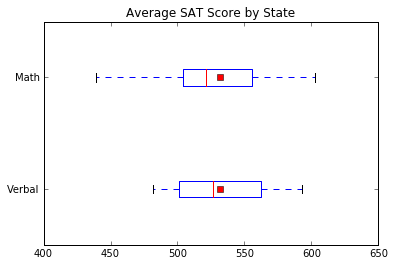

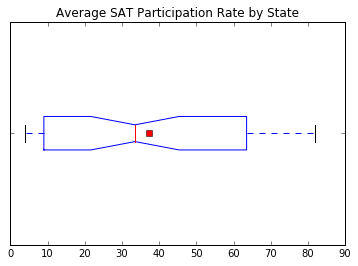

In [29]:
plt.boxplot((x,y), 0, 'rs', 0, showmeans = True, labels=('Verbal','Math'))
plt.title(r'Average SAT Score by State')
plt.show()

#Did the box plot for rate seperately as it has a different scale and doesn't really make sense with the others
#Notch this one, just for fun
plt.boxplot(z, 1, 'rs', 0, showmeans = True, labels = (' '))
plt.title(r'Average SAT Participation Rate by State')
plt.show()

##### BONUS: Using Tableau, create a heat map for each variable using a map of the US. 

Having Tableau issues, I'll have to skp the bonus.